<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/circadian_period_q10_for_cyano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circadian period Q<sub>10</sub> calculator for cyano


Temperature =  [25.2 25.2 25.2 27.5 27.5 27.5 29.5 29.5 29.5 32.  32.  32.  34.1 34.1
 34.1 35.8 35.8 35.8]
Period =  [34.4 33.1 32.9 30.8 30.1 29.9 27.3 27.1 27.7 24.8 24.3 24.1 21.3 20.8
 20.1 19.7 18.5 18.7] 

Tau30 (estimated period length at 30°C) = 26.322 ± 0.165
Q10 (temperature coefficient) = 1.696 ± 0.029
r-squared = 0.983886 

Dataset
Temp (°C)	Period (hours)
25.2	34.4
25.2	33.1
25.2	32.9
27.5	30.8
27.5	30.1
27.5	29.9
29.5	27.3
29.5	27.1
29.5	27.7
32.0	24.8
32.0	24.3
32.0	24.1
34.1	21.3
34.1	20.8
34.1	20.1
35.8	19.7
35.8	18.5
35.8	18.7

Fitted Curve
Temp (°C)	Period (hours)
21.000	42.347
21.095	42.134
21.191	41.922
21.286	41.711
21.382	41.501
21.477	41.292
21.573	41.084
21.668	40.877
21.764	40.672
21.859	40.467
21.955	40.264
22.050	40.061
22.146	39.859
22.241	39.659
22.337	39.459
22.432	39.261
22.528	39.063
22.623	38.867
22.719	38.671
22.814	38.476
22.910	38.283
23.005	38.090
23.101	37.899
23.196	37.708
23.291	37.518
23.387	37.329
23.482	37.142
23.578	36.955
23.673	36.769
23.

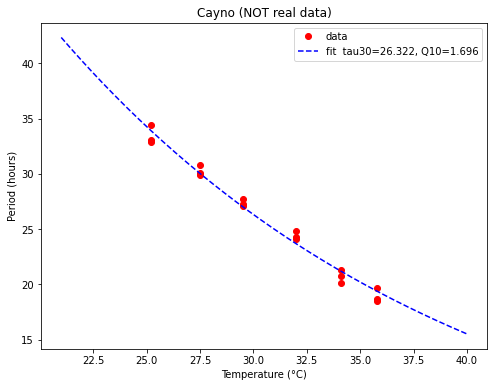

In [13]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Data description (plot title)
Data_description = "Cayno (NOT real data)" #@param {type:"string"}

# Temperature data
Temperatures = 25.2, 25.2, 25.2, 27.5, 27.5, 27.5, 29.5, 29.5, 29.5, 32.0, 32.0, 32.0, 34.1, 34.1, 34.1, 35.8, 35.8, 35.8 #@param {type:"raw"}
x = np.array(Temperatures) 

# Period data
Periods =  34.4, 33.1, 32.9, 30.8, 30.1, 29.9, 27.3, 27.1, 27.7, 24.8, 24.3, 24.1, 21.3, 20.8, 20.1, 19.7, 18.5, 18.7 #@param {type:"raw"}
y = np.array(Periods)

# Printing the data
print('Temperature = ', x)
print('Period = ', y, '\n')

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "No" #@param ["No", "Yes"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau30 : period at 30 degree Celsius
#     q10 : temperature coefficient (Q10)
def func(x, tau30, q10):
	return tau30 / ( q10 ** ( ( x - 30 ) * 0.1 ) )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)

# Printing the results
print(u'Tau30 (estimated period length at 30\u00B0C) =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5))
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))

residuals = y - func(x, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y-np.mean(y))**2)
r_squared = 1 - ( ss_residuals / ss_total )
print(u'r-squared =', '{:.6f}'.format(r_squared), u'\n')

fig = plt.figure(figsize = (8,6))
fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.333 )
fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.333 ) + 1
fcx = np.linspace(fcxmin, fcxmax, 200)
	
plt.plot(x, y, 'o', color ='red', label ='data')
fcy = func(fcx, popt[0], popt[1])	
plt.plot(fcx, fcy, '--', color='blue', label ='fit  tau30=%5.3f, Q10=%5.3f' % tuple(popt))
plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

if Display_tab_delimited_data == "Yes":
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:	
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for fcxseq in fcx:	
		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
		fcycount += 1
	print(u'\n')

plt.legend()
plt.show()

### End of script